<a href="https://colab.research.google.com/github/arifinnasif/vinternship_predictive_maintenance/blob/fiddling-branch/sps_predictive_maintainance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

drive.mount("/content/drive")
os.chdir(os.path.join("/content", "drive", "MyDrive", "ML Internship"))

Mounted at /content/drive


In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [34]:
df = pd.read_csv("./Group 3.csv")
df_new = df.drop(["id", "acmotor"], axis=1)
df_new.corr()['bearings'].sort_values(ascending=False)

bearings               1.000000
water_flow             0.360265
noise_db               0.349152
air_flow               0.169417
gaccz                  0.045373
haccz                  0.045117
outlet_pressure_bar    0.028056
torque                 0.027546
oilpump_power          0.019425
haccy                  0.019404
motor_power            0.012271
gaccx                  0.001029
rpm                    0.000112
haccx                 -0.000724
gaccy                 -0.001068
wpump_outlet_press    -0.088477
wpump_power           -0.101119
oil_tank_temp         -0.137766
water_inlet_temp      -0.138962
water_outlet_temp     -0.141253
outlet_temp           -0.145536
wpump                 -0.250000
radiator              -0.250000
exvalve               -0.250000
Name: bearings, dtype: float64

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16,input_shape=(20,),kernel_initializer='he_uniform',activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=4,activation='sigmoid')
])

In [56]:
X=df_new.drop(['bearings','wpump','radiator','exvalve'], axis=1)
y=df_new[['bearings','wpump','radiator','exvalve']]
X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), batch_size=32)

# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
# mcp_save = tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
# reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-5, mode='min')

# model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[earlyStopping, mcp_save, reduce_lr_loss], batch_size=64)

Epoch 1/500
25/25 [==============================] - 2s 10ms/step - loss: 4.4863 - accuracy: 0.6050 - val_loss: 1.3152 - val_accuracy: 0.7350
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.8338 - val_loss: 0.8183 - val_accuracy: 0.8750
Epoch 3/500
25/25 [==============================] - 0s 4ms/step - loss: 0.4600 - accuracy: 0.8650 - val_loss: 0.1590 - val_accuracy: 0.9850
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.4563 - accuracy: 0.8788 - val_loss: 1.2799 - val_accuracy: 0.8400
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5938 - accuracy: 0.8288 - val_loss: 0.4408 - val_accuracy: 0.8800
Epoch 6/500
25/25 [==============================] - 0s 4ms/step - loss: 0.3140 - accuracy: 0.9287 - val_loss: 0.3528 - val_accuracy: 0.7450
Epoch 7/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.8175 - val_loss: 1.0224 - val_accuracy: 0.7950
Epoch 8/500


In [59]:
x_test_sample=[[1499.52, 6984.88, 49.186, 4.06, 754.67, 53.41, 118.86, 2.80, 83.02, 96.64, 222.19, 53.71, 300.48, 46.24, 0.60, 0.35, 3.92, 1.10, 1.35, 3.50]]
result=np.round(model.predict(x_test_sample))
# print(model.predict(x_test_sample))
for i in range(len(result)):
  print("bearing : ",result[i][0],"|| wpump : ",result[i][1],"|| radiator : ",result[i][2],"|| exvalve : ",result[i][3])

1/1 [==============================] - 0s 84ms/step
bearing :  0.0 || wpump :  0.0 || radiator :  1.0 || exvalve :  0.0


32/32 [==============================] - 0s 2ms/step


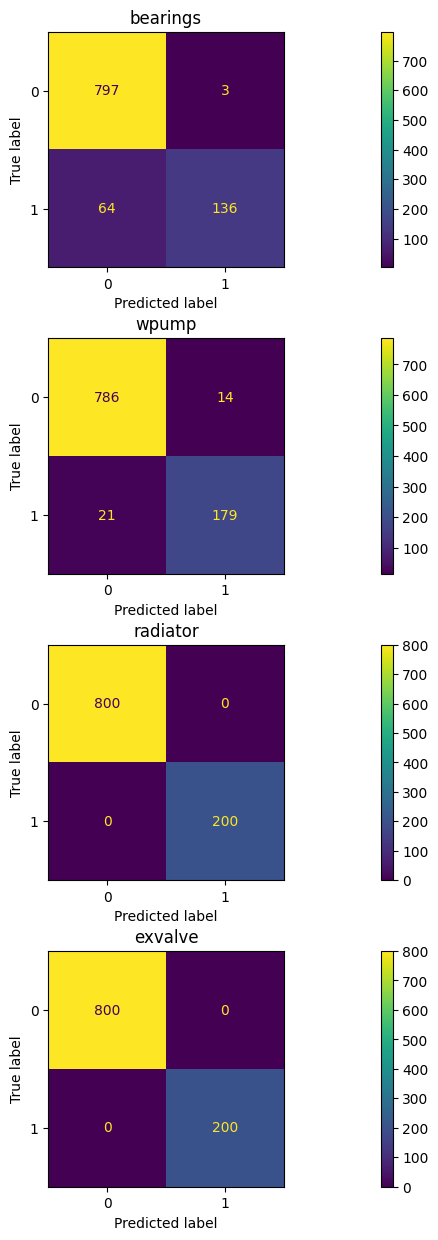

In [60]:
y_pred = np.round(model.predict(X))
y_actual = y
f, axes = plt.subplots(4, 1, figsize=(25, 15))
axes = axes.ravel()
labels=['bearings', 'wpump', 'radiator', 'exvalve']
for i in range(4):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_actual[:, i],
                                                   y_pred[:, i]),
                                  display_labels=[0, 1])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(labels[i])
    
    # disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.3)
# f.colorbar(disp.im_, ax=axes)
plt.show()